In [1]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from keras.models import Sequential
import numpy as np



Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

In [4]:
(training_image,training_label),(testing_image,testing_label)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
print(len(training_image))

60000


In [6]:
print(training_image.shape)
training_image=training_image/255.0
testing_image=testing_image/255.0
training_image=np.expand_dims(training_image,3)
testing_image=np.expand_dims(testing_image,3)


(60000, 28, 28)


In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [30]:
class mycallbacks(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    if logs.get('acc')>0.998:
      print("Accurcy reached greater then 99.8 percentage")
      model.stop_training=True
callbacks=mycallbacks()

In [9]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.Adam(lr=0.001),metrics=["acc"])

In [31]:
history=model.fit(training_image,training_label,epochs=,batch_size=100,callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.0369 - acc: 0.9888
Epoch 2/10
60000/60000 [==============================] - 44s 731us/step - loss: 0.0277 - acc: 0.9912
Epoch 3/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0210 - acc: 0.9932
Epoch 4/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0161 - acc: 0.9948
Epoch 5/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0135 - acc: 0.9957
Epoch 6/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0112 - acc: 0.9964
Epoch 7/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.0094 - acc: 0.9969
Epoch 8/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.0078 - acc: 0.9976
Epoch 9/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.0071 - acc: 0.9974
Epoch 10/10
60000/60000 [==============================] - 44s 727us/step - loss: 

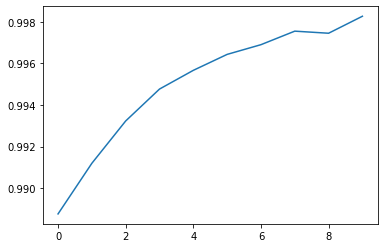

In [54]:
acc=history.history["acc"]
plt.plot(history.epoch,acc,label="accuracy")

In [34]:
result=model.evaluate(testing_image,testing_label)

10000/10000 [==============================] - 2s 250us/step


In [38]:
training_acc=history.history["loss"]
testing_acc=
print(training_acc,testing_acc)

[0.0369292561088029, 0.027679324123892003, 0.021017430093609922, 0.016071948760072702, 0.013497106143040583, 0.011156302444045044, 0.009414905483508847, 0.007751778210701256, 0.007137300777994824, 0.0050568672064764545] 0.9886000156402588


In [14]:
print(result)
print(training_image[3].shape,testing_image[1].shape)

[0.05017864742809906, 0.9839000105857849]
(28, 28, 1) (28, 28, 1)


In [15]:
hell=np.expand_dims(testing_image[3],0)
# plt.imshow(hell)
# plt.imshow(hello)
# print(hell.shape)
print(np.argmax(model.predict(hell)))
print(testing_label[3])

0
0


In [55]:
from google.colab import files
uploaded=files.upload()

Saving seven.png to seven (4).png


In [56]:
import cv2
from google.colab.patches import cv2_imshow

seven.png
The model predicted the digit as  7


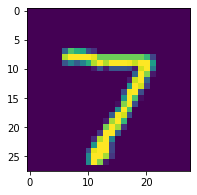

In [58]:
import os
for imggg in uploaded:

  print(imggg)
  path=os.getcwd()
  # print(path)
  path=str(path)+"/"+str(imggg)
  # print(path)
  
  imggg=cv2.imread(path,0)
  # print(imggg.shape)
  imggg=cv2.resize(imggg,(28,28))
  plt.figure(figsize=(3.0,3.0))
  plt.imshow(imggg)
  # print(imggg.shape)
  imggg=np.expand_dims(imggg,0)
  imggg=np.expand_dims(imggg,3)
  # print(imggg.shape)

  
  
  

  print("The model predicted the digit as ",np.argmax(model.predict(imggg)))
  
  